## To DO
1. new features: 5 minute aggregates of the past hour, five minutes trends and volatility and other technical analysis, 1 day, 3 day 7 day trends and technical markers
2. timeseries cross-validation
3. Hyper-prameter tuning
4. train on single company or multiple? 

### v1 create features: 
1. prev hour open high low close
2. delta t-1, t-2 in open high low close
3. avg(last 3 open high low close)
4. dif high-low 
5. mean/std dif high-low over the past 3/7 days
6. ratio dif high-low last 3 hours to past few x days8.
8. HR of day
9. Day of week

### v2 features
1. trend over the past 3 hours, day, 3 days, 4 days



### v3
next stage asset type category, e.g. china, tech, pharma, etc, and trends in asset subtype 


In [129]:
from datetime import timedelta
from tqdm.notebook import tqdm
import time
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt

In [130]:
from alpaca.data import StockHistoricalDataClient, TimeFrame
from alpaca.data.requests import StockQuotesRequest, StockBarsRequest

import pandas as pd

In [131]:
ALPACA_API_KEY_ID = 'AKD6RN71LH3CYRPZ2TK6'
ALPACA_API_SECRET_KEY = 'geVhRcGn92gCLfmde8TGx2CczeTPOFveVwBPCYT9'

# Instantiate a data client
data_client = StockHistoricalDataClient(ALPACA_API_KEY_ID, ALPACA_API_SECRET_KEY)

# Set the start time
start_time = pd.to_datetime("2020-01-01").tz_localize('America/New_York')

# It's generally best to explicitly provide an end time but will default to 'now' if not
request_params = StockBarsRequest(
    symbol_or_symbols=['GOOGL','NVDA','MSFT','AAPL'],
    timeframe=TimeFrame.Hour,
    start=start_time
    )

bars_df = data_client.get_stock_bars(request_params).df.tz_convert('America/New_York', level=1)

In [132]:
bars_df.to_csv('data/bars_hourly_20200101_GGL_NVD_MS_APL.csv')

# feature engineering

In [133]:
bars_df=bars_df.reset_index()
#bars_df=bars_df.set_index('timestamp')

# Create feature dataset

In [135]:
symbols=bars_df.symbol.unique()

In [55]:
bars_df['delta_HL']=bars_df["high"]-bars_df["low"]
feature_columns=['last_value_open','last_value_high','last_value_low','last_value_close','last_value_volume','last_value_trade_count','last_value_vwap','last_value_delta_HL','diff_last_open','diff_last_high','diff_last_low','diff_last_close','diff_last_volume','diff_last_trade_count','diff_last_vwap','diff_last_delta_HL','mean_last_3b_open','mean_last_3b_high','mean_last_3b_low','mean_last_3b_close','mean_last_3b_volume','mean_last_3b_trade_count','mean_last_3b_vwap','mean_last_3b_delta_HL','std_last_3b_open','std_last_3b_high','std_last_3b_low','std_last_3b_close','std_last_3b_volume','std_last_3b_trade_count','std_last_3b_vwap','std_last_3b_delta_HL','mean_last_16b_open','mean_last_16b_high','mean_last_16b_low','mean_last_16b_close','mean_last_16b_volume','mean_last_16b_trade_count','mean_last_16b_vwap','mean_last_16b_delta_HL','std_last_16b_open','std_last_16b_high','std_last_16b_low','std_last_16b_close','std_last_16b_volume','std_last_16b_trade_count','std_last_16b_vwap','std_last_16b_delta_HL','mean_last_48b_open','mean_last_48b_high','mean_last_48b_low','mean_last_48b_close','mean_last_48b_volume','mean_last_48b_trade_count','mean_last_48b_vwap','mean_last_48b_delta_HL','std_last_48b_open','std_last_48b_high','std_last_48b_low','std_last_48b_close','std_last_48b_volume','std_last_48b_trade_count','std_last_48b_vwap','std_last_48b_delta_HL','mean_last_100b_open','mean_last_100b_high','mean_last_100b_low','mean_last_100b_close','mean_last_100b_volume','mean_last_100b_trade_count','mean_last_100b_vwap','mean_last_100b_delta_HL','std_last_100b_open','std_last_100b_high','std_last_100b_low','std_last_100b_close','std_last_100b_volume','std_last_100b_trade_count','std_last_100b_vwap','std_last_100b_delta_HL','ratio_last_mean_past3_open','ratio_last_mean_past3_high','ratio_last_mean_past3_low','ratio_last_mean_past3_close','ratio_last_mean_past3_volume','ratio_last_mean_past3_trade_count','ratio_last_mean_past3_vwap','ratio_last_mean_past3_delta_HL','ratio_last_std_past3_open','ratio_last_std_past3_high','ratio_last_std_past3_low','ratio_last_std_past3_close','ratio_last_std_past3_volume','ratio_last_std_past3_trade_count','ratio_last_std_past3_vwap','ratio_last_std_past3_delta_HL','ratio_last_mean_past16_open','ratio_last_mean_past16_high','ratio_last_mean_past16_low','ratio_last_mean_past16_close','ratio_last_mean_past16_volume','ratio_last_mean_past16_trade_count','ratio_last_mean_past16_vwap','ratio_last_mean_past16_delta_HL','ratio_last_std_past16_open','ratio_last_std_past16_high','ratio_last_std_past16_low','ratio_last_std_past16_close','ratio_last_std_past16_volume','ratio_last_std_past16_trade_count','ratio_last_std_past16_vwap','ratio_last_std_past16_delta_HL','ratio_last_mean_past48_open','ratio_last_mean_past48_high','ratio_last_mean_past48_low','ratio_last_mean_past48_close','ratio_last_mean_past48_volume','ratio_last_mean_past48_trade_count','ratio_last_mean_past48_vwap','ratio_last_mean_past48_delta_HL','ratio_last_std_past48_open','ratio_last_std_past48_high','ratio_last_std_past48_low','ratio_last_std_past48_close','ratio_last_std_past48_volume','ratio_last_std_past48_trade_count','ratio_last_std_past48_vwap','ratio_last_std_past48_delta_HL','ratio_past3_mean_past16_open','ratio_past3_mean_past16_high','ratio_past3_mean_past16_low','ratio_past3_mean_past16_close','ratio_past3_mean_past16_volume','ratio_past3_mean_past16_trade_count','ratio_past3_mean_past16_vwap','ratio_past3_mean_past16_delta_HL','ratio_past3_std_past16_open','ratio_past3_std_past16_high','ratio_past3_std_past16_low','ratio_past3_std_past16_close','ratio_past3_std_past16_volume','ratio_past3_std_past16_trade_count','ratio_past3_std_past16_vwap','ratio_past3_std_past16_delta_HL','ratio_past16_mean_past48_open','ratio_past16_mean_past48_high','ratio_past16_mean_past48_low','ratio_past16_mean_past48_close','ratio_past16_mean_past48_volume','ratio_past16_mean_past48_trade_count','ratio_past16_mean_past48_vwap','ratio_past16_mean_past48_delta_HL','ratio_past16_std_past48_open','ratio_past16_std_past48_high','ratio_past16_std_past48_low','ratio_past16_std_past48_close','ratio_past16_std_past48_volume','ratio_past16_std_past48_trade_count','ratio_past16_std_past48_vwap','ratio_past16_std_past48_delta_HL','ratio_past48_mean_past100_open','ratio_past48_mean_past100_high','ratio_past48_mean_past100_low','ratio_past48_mean_past100_close','ratio_past48_mean_past100_volume','ratio_past48_mean_past100_trade_count','ratio_past48_mean_past100_vwap','ratio_past48_mean_past100_delta_HL','ratio_past48_std_past100_open','ratio_past48_std_past100_high','ratio_past48_std_past100_low','ratio_past48_std_past100_close','ratio_past48_std_past100_volume','ratio_past48_std_past100_trade_count','ratio_past48_std_past100_vwap','ratio_past48_std_past100_delta_HL','zscore_last_past3_open','zscore_last_past3_high','zscore_last_past3_low','zscore_last_past3_close','zscore_last_past3_volume','zscore_last_past3_trade_count','zscore_last_past3_vwap','zscore_last_past3_delta_HL','zscore_last_past16_open','zscore_last_past16_high','zscore_last_past16_low','zscore_last_past16_close','zscore_last_past16_volume','zscore_last_past16_trade_count','zscore_last_past16_vwap','zscore_last_past16_delta_HL','zscore_last_past48_open','zscore_last_past48_high','zscore_last_past48_low','zscore_last_past48_close','zscore_last_past48_volume','zscore_last_past48_trade_count','zscore_last_past48_vwap','zscore_last_past48_delta_HL','zscore_last_past100_open','zscore_last_past100_high','zscore_last_past100_low','zscore_last_past100_close','zscore_last_past100_volume','zscore_last_past100_trade_count','zscore_last_past100_vwap','zscore_last_past100_delta_HL','zscore_pas3_past16_open','zscore_pas3_past16_high','zscore_pas3_past16_low','zscore_pas3_past16_close','zscore_pas3_past16_volume','zscore_pas3_past16_trade_count','zscore_pas3_past16_vwap','zscore_pas3_past16_delta_HL','zscore_past3_past48_open','zscore_past3_past48_high','zscore_past3_past48_low','zscore_past3_past48_close','zscore_past3_past48_volume','zscore_past3_past48_trade_count','zscore_past3_past48_vwap','zscore_past3_past48_delta_HL','zscore_past3_past100_open','zscore_past3_past100_high','zscore_past3_past100_low','zscore_past3_past100_close','zscore_past3_past100_volume','zscore_past3_past100_trade_count','zscore_past3_past100_vwap','zscore_past3_past100_delta_HL']
fl_df_all=pd.DataFrame()
for symbol in symbols:
    bars_df_symbol=bars_df[bars_df['symbol']==symbol]
    bars_df_symbol.sort_values(by='timestamp')
    fl_df=pd.DataFrame(index=bars_df_symbol.index[100:],columns=feature_columns)
    for index in tqdm(range(100,bars_df_symbol.shape[0])):
        pred_time_index = bars_df_symbol.index[index]
        cols=["open","high","low", "close","volume","trade_count","vwap","delta_HL"]
        f1=bars_df_symbol.iloc[index-1][cols].rename(index={col:'last_value_'+col for col in cols})
        #simple historical stats
        f2=(bars_df_symbol.iloc[index-2][cols]-bars_df_symbol.iloc[index-1][cols]).rename(index={col:'diff_last_'+col for col in cols})
        f3=bars_df_symbol.iloc[index-3:index][cols].mean().rename(index={col:'mean_last_3b_'+col for col in cols})
        f4=bars_df_symbol.iloc[index-3:index][cols].std().rename(index={col:'std_last_3b_'+col for col in cols})
        f5=bars_df_symbol.iloc[index-16:index][cols].mean().rename(index={col:'mean_last_16b_'+col for col in cols})
        f6=bars_df_symbol.iloc[index-16:index][cols].std().rename(index={col:'std_last_16b_'+col for col in cols})
        f7=bars_df_symbol.iloc[index-3*16:index][cols].mean().rename(index={col:'mean_last_48b_'+col for col in cols})
        f8=bars_df_symbol.iloc[index-3*16:index][cols].std().rename(index={col:'std_last_48b_'+col for col in cols})
        f9=bars_df_symbol.iloc[index-100:index][cols].mean().rename(index={col:'mean_last_100b_'+col for col in cols})
        f10=bars_df_symbol.iloc[index-100:index][cols].std().rename(index={col:'std_last_100b_'+col for col in cols})
        #ratios
        f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
        f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
        f13=pd.Series(f1.values/f5.values,index=['ratio_last_mean_past16_'+col for col in cols])
        f14=pd.Series(f1.values/f6.values,index=['ratio_last_std_past16_'+col for col in cols])
        f15=pd.Series(f1.values/f7.values,index=['ratio_last_mean_past48_'+col for col in cols])
        f16=pd.Series(f1.values/f8.values,index=['ratio_last_std_past48_'+col for col in cols])
        
        f17=pd.Series(f3.values/f5.values,index=['ratio_past3_mean_past16_'+col for col in cols])
        f18=pd.Series(f4.values/f6.values,index=['ratio_past3_std_past16_'+col for col in cols])
        f19=pd.Series(f5.values/f7.values,index=['ratio_past16_mean_past48_'+col for col in cols])
        f20=pd.Series(f6.values/f8.values,index=['ratio_past16_std_past48_'+col for col in cols])
        f21=pd.Series(f7.values/f9.values,index=['ratio_past48_mean_past100_'+col for col in cols])
        f22=pd.Series(f8.values/f10.values,index=['ratio_past48_std_past100_'+col for col in cols])
        #z-scores
        f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
        f24=pd.Series((f1.values-f5.values)/f6.values,index=['zscore_last_past16_'+col for col in cols])
        f25=pd.Series((f1.values-f7.values)/f8.values,index=['zscore_last_past48_'+col for col in cols])
        f26=pd.Series((f1.values-f9.values)/f10.values,index=['zscore_last_past100_'+col for col in cols])
        
        f27=pd.Series((f3.values-f5.values)/f6.values,index=['zscore_pas3_past16_'+col for col in cols])
        f28=pd.Series((f3.values-f7.values)/f8.values,index=['zscore_past3_past48_'+col for col in cols])
        f29=pd.Series((f3.values-f9.values)/f10.values,index=['zscore_past3_past100_'+col for col in cols])
        
        #add percentage change std 3to16 and 16to48 to capture uncertainty/volatility
        features_df=pd.DataFrame(pd.concat([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29],axis=0)).rename(columns={0:pred_time_index}).T
        #
        fl_df.loc[pred_time_index]=features_df.squeeze()
    
    #day of week & hour of day
    fl_df['hour_of_day']=pd.Series(pd.Series(bars_df_symbol.index).dt.hour.values,index=bars_df_symbol.index)
    fl_df['day_of_week']=pd.Series(pd.Series(bars_df_symbol.index).dt.day_of_week.values,index=bars_df_symbol.index)

    #fl_df['symbol']=symbol
    
    #join with hour bars for prediction
    fl_df=fl_df.join(bars_df_symbol,how='left')

    fl_df_all=pd.concat([fl_df_all,fl_df])



feature_columns=feature_columns+['hour_of_day','day_of_week','symbol']



#fl_df['label']
fl_df_all['label']=(fl_df_all['high']>=1.01*fl_df_all['last_value_close'])

  0%|          | 0/16012 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykern

  0%|          | 0/13809 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in scalar divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: Runti

  0%|          | 0/15996 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: RuntimeWarning: invalid value encountered in scalar divide
  f23=pd.Series((f1.values-f3.values)/f4.values,index=['zscore_last_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykern

  0%|          | 0/15885 [00:00<?, ?it/s]

/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in scalar divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:22: RuntimeWarning: invalid value encountered in divide
  f11=pd.Series(f1.values/f3.values,index=['ratio_last_mean_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in scalar divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:23: RuntimeWarning: invalid value encountered in divide
  f12=pd.Series(f1.values/f4.values,index=['ratio_last_std_past3_'+col for col in cols])
/var/folders/py/0zhmvb2j0j92g6v585t5g_qc0000gn/T/ipykernel_26309/2588251272.py:36: Runti

In [56]:
fl_df_all.to_csv('data/fl_hourly_20200101_GGL_NVD_MS_APL.csv')

# Model training 

In [11]:
import lightgbm as lgb

In [63]:
fl_df=pd.read_csv('data/fl_hourly_20200101_GGL_NVD_MS_APL.csv',index_col='timestamp')
feature_columns=['hour_of_day','day_of_week','symbol']+['last_value_open','last_value_high','last_value_low','last_value_close','last_value_volume','last_value_trade_count','last_value_vwap','last_value_delta_HL','diff_last_open','diff_last_high','diff_last_low','diff_last_close','diff_last_volume','diff_last_trade_count','diff_last_vwap','diff_last_delta_HL','mean_last_3b_open','mean_last_3b_high','mean_last_3b_low','mean_last_3b_close','mean_last_3b_volume','mean_last_3b_trade_count','mean_last_3b_vwap','mean_last_3b_delta_HL','std_last_3b_open','std_last_3b_high','std_last_3b_low','std_last_3b_close','std_last_3b_volume','std_last_3b_trade_count','std_last_3b_vwap','std_last_3b_delta_HL','mean_last_16b_open','mean_last_16b_high','mean_last_16b_low','mean_last_16b_close','mean_last_16b_volume','mean_last_16b_trade_count','mean_last_16b_vwap','mean_last_16b_delta_HL','std_last_16b_open','std_last_16b_high','std_last_16b_low','std_last_16b_close','std_last_16b_volume','std_last_16b_trade_count','std_last_16b_vwap','std_last_16b_delta_HL','mean_last_48b_open','mean_last_48b_high','mean_last_48b_low','mean_last_48b_close','mean_last_48b_volume','mean_last_48b_trade_count','mean_last_48b_vwap','mean_last_48b_delta_HL','std_last_48b_open','std_last_48b_high','std_last_48b_low','std_last_48b_close','std_last_48b_volume','std_last_48b_trade_count','std_last_48b_vwap','std_last_48b_delta_HL','mean_last_100b_open','mean_last_100b_high','mean_last_100b_low','mean_last_100b_close','mean_last_100b_volume','mean_last_100b_trade_count','mean_last_100b_vwap','mean_last_100b_delta_HL','std_last_100b_open','std_last_100b_high','std_last_100b_low','std_last_100b_close','std_last_100b_volume','std_last_100b_trade_count','std_last_100b_vwap','std_last_100b_delta_HL','ratio_last_mean_past3_open','ratio_last_mean_past3_high','ratio_last_mean_past3_low','ratio_last_mean_past3_close','ratio_last_mean_past3_volume','ratio_last_mean_past3_trade_count','ratio_last_mean_past3_vwap','ratio_last_mean_past3_delta_HL','ratio_last_std_past3_open','ratio_last_std_past3_high','ratio_last_std_past3_low','ratio_last_std_past3_close','ratio_last_std_past3_volume','ratio_last_std_past3_trade_count','ratio_last_std_past3_vwap','ratio_last_std_past3_delta_HL','ratio_last_mean_past16_open','ratio_last_mean_past16_high','ratio_last_mean_past16_low','ratio_last_mean_past16_close','ratio_last_mean_past16_volume','ratio_last_mean_past16_trade_count','ratio_last_mean_past16_vwap','ratio_last_mean_past16_delta_HL','ratio_last_std_past16_open','ratio_last_std_past16_high','ratio_last_std_past16_low','ratio_last_std_past16_close','ratio_last_std_past16_volume','ratio_last_std_past16_trade_count','ratio_last_std_past16_vwap','ratio_last_std_past16_delta_HL','ratio_last_mean_past48_open','ratio_last_mean_past48_high','ratio_last_mean_past48_low','ratio_last_mean_past48_close','ratio_last_mean_past48_volume','ratio_last_mean_past48_trade_count','ratio_last_mean_past48_vwap','ratio_last_mean_past48_delta_HL','ratio_last_std_past48_open','ratio_last_std_past48_high','ratio_last_std_past48_low','ratio_last_std_past48_close','ratio_last_std_past48_volume','ratio_last_std_past48_trade_count','ratio_last_std_past48_vwap','ratio_last_std_past48_delta_HL','ratio_past3_mean_past16_open','ratio_past3_mean_past16_high','ratio_past3_mean_past16_low','ratio_past3_mean_past16_close','ratio_past3_mean_past16_volume','ratio_past3_mean_past16_trade_count','ratio_past3_mean_past16_vwap','ratio_past3_mean_past16_delta_HL','ratio_past3_std_past16_open','ratio_past3_std_past16_high','ratio_past3_std_past16_low','ratio_past3_std_past16_close','ratio_past3_std_past16_volume','ratio_past3_std_past16_trade_count','ratio_past3_std_past16_vwap','ratio_past3_std_past16_delta_HL','ratio_past16_mean_past48_open','ratio_past16_mean_past48_high','ratio_past16_mean_past48_low','ratio_past16_mean_past48_close','ratio_past16_mean_past48_volume','ratio_past16_mean_past48_trade_count','ratio_past16_mean_past48_vwap','ratio_past16_mean_past48_delta_HL','ratio_past16_std_past48_open','ratio_past16_std_past48_high','ratio_past16_std_past48_low','ratio_past16_std_past48_close','ratio_past16_std_past48_volume','ratio_past16_std_past48_trade_count','ratio_past16_std_past48_vwap','ratio_past16_std_past48_delta_HL','ratio_past48_mean_past100_open','ratio_past48_mean_past100_high','ratio_past48_mean_past100_low','ratio_past48_mean_past100_close','ratio_past48_mean_past100_volume','ratio_past48_mean_past100_trade_count','ratio_past48_mean_past100_vwap','ratio_past48_mean_past100_delta_HL','ratio_past48_std_past100_open','ratio_past48_std_past100_high','ratio_past48_std_past100_low','ratio_past48_std_past100_close','ratio_past48_std_past100_volume','ratio_past48_std_past100_trade_count','ratio_past48_std_past100_vwap','ratio_past48_std_past100_delta_HL','zscore_last_past3_open','zscore_last_past3_high','zscore_last_past3_low','zscore_last_past3_close','zscore_last_past3_volume','zscore_last_past3_trade_count','zscore_last_past3_vwap','zscore_last_past3_delta_HL','zscore_last_past16_open','zscore_last_past16_high','zscore_last_past16_low','zscore_last_past16_close','zscore_last_past16_volume','zscore_last_past16_trade_count','zscore_last_past16_vwap','zscore_last_past16_delta_HL','zscore_last_past48_open','zscore_last_past48_high','zscore_last_past48_low','zscore_last_past48_close','zscore_last_past48_volume','zscore_last_past48_trade_count','zscore_last_past48_vwap','zscore_last_past48_delta_HL','zscore_last_past100_open','zscore_last_past100_high','zscore_last_past100_low','zscore_last_past100_close','zscore_last_past100_volume','zscore_last_past100_trade_count','zscore_last_past100_vwap','zscore_last_past100_delta_HL','zscore_pas3_past16_open','zscore_pas3_past16_high','zscore_pas3_past16_low','zscore_pas3_past16_close','zscore_pas3_past16_volume','zscore_pas3_past16_trade_count','zscore_pas3_past16_vwap','zscore_pas3_past16_delta_HL','zscore_past3_past48_open','zscore_past3_past48_high','zscore_past3_past48_low','zscore_past3_past48_close','zscore_past3_past48_volume','zscore_past3_past48_trade_count','zscore_past3_past48_vwap','zscore_past3_past48_delta_HL','zscore_past3_past100_open','zscore_past3_past100_high','zscore_past3_past100_low','zscore_past3_past100_close','zscore_past3_past100_volume','zscore_past3_past100_trade_count','zscore_past3_past100_vwap','zscore_past3_past100_delta_HL']
categorical=['symbol']

In [72]:
for cat in categorical:
    fl_df[cat]=fl_df[cat].astype("category")

In [83]:
fl_df.index.min(),fl_df.index.max()

('2020-01-10 10:00:00-05:00', '2024-02-02 19:00:00-05:00')

In [94]:
train_indxs=list(set(fl_df.index[fl_df.index<'2023-09-01 ']))
test_indxs=list(set(fl_df.index[fl_df.index>='2023-09-01 ']))

train=fl_df.loc[train_indxs]
test=fl_df.loc[test_indxs]

In [95]:
clf = lgb.LGBMClassifier(categorical_features=['symbol'])
clf.fit(train[feature_columns], train['label'])

/opt/anaconda3/envs/hft/lib/python3.8/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_features in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


LGBMClassifier(categorical_features=['symbol'])

No Skill: ROC AUC=0.500
Model: ROC AUC=0.887


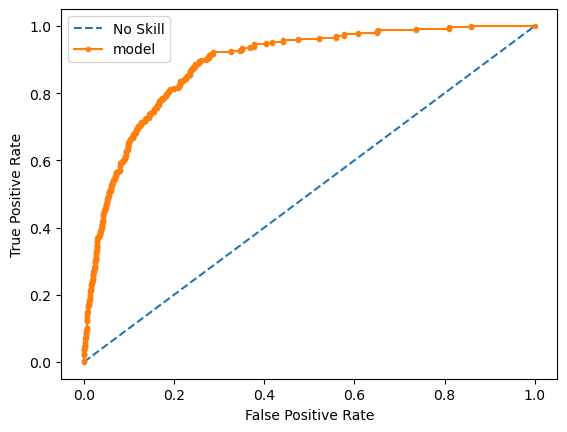

In [96]:
ns_probs = [0 for _ in range(test.shape[0])]
# fit a model

# predict probabilities
model_probs = clf.predict_proba(test[feature_columns])[:, 1]
# calculate scores
ns_auc = roc_auc_score(test['label'], ns_probs)
model_auc = roc_auc_score(test['label'], model_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test['label'], ns_probs)
model_fpr, model_tpr, _ = roc_curve(test['label'], model_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(model_fpr, model_tpr, marker='.', label='model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [121]:
test_scores=pd.concat([pd.Series(model_probs,index=test.index),test['symbol']],axis=1).rename(columns={0:'score'})

In [125]:
test.symbol.unique()

['AAPL', 'GOOGL', 'MSFT', 'NVDA']
Categories (4, object): ['AAPL', 'GOOGL', 'MSFT', 'NVDA']

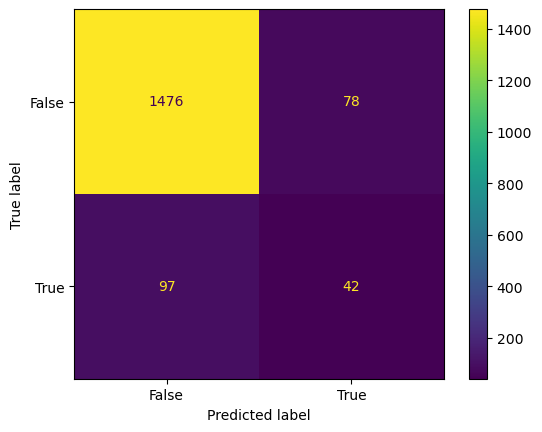

In [128]:
symbol='NVDA'
cm = confusion_matrix(test[test.symbol==symbol]['label'], test_scores[test.symbol==symbol].score>0.3, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()

In [ ]:
# ROC history: iteration 1: ROC AUC=0.809